In [1]:
import numpy as np
import operator
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import *
from scipy.stats.stats import pearsonr
from scipy import constants
from numpy import linalg as la
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 10
rcParams.update({'font.size': 16})

In [2]:
def w(s, upto):
    #
    b = np.arange(s, upto, .01)
    return (b-s)/(b*s)*np.pi*constants.Rydberg*2*constants.c
def phi(s, upto):#S is series parameter. 1 for lymann 2 for balmer etc.
    b = np.arange(s, upto, .01)
    return -(np.sqrt(b)-np.sqrt(s))*2*np.pi

In [3]:
w(1,1000)

array([  0.00000000e+00,   2.04660264e+14,   4.05307582e+14, ...,
         2.06500154e+16,   2.06500156e+16,   2.06500158e+16])

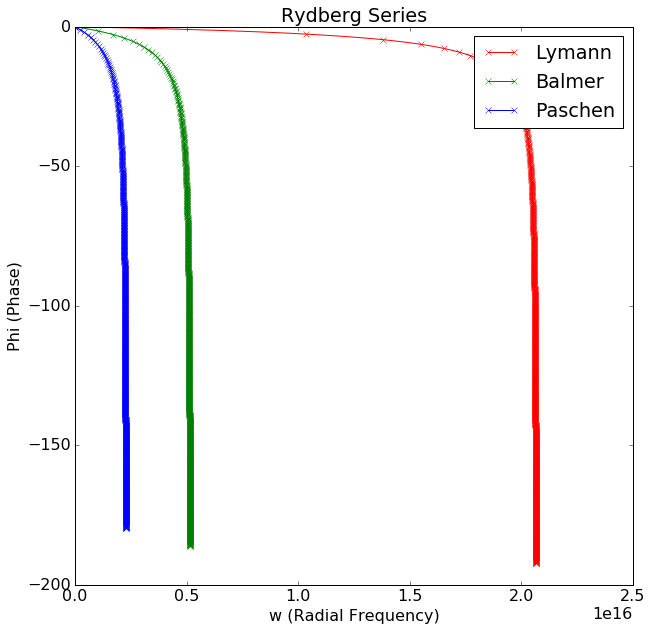

In [4]:
plt.title('Rydberg Series')
plt.xlabel('w (Radial Frequency)')
plt.ylabel('Phi (Phase)')
lymann = plt.plot(w(1, 1000), phi(1, 1000), color='red', label='Lymann', marker='x', markevery=100)
balmer = plt.plot(w(4, 1000), phi(4, 1000), color='green', label='Balmer', marker='x', markevery=100)
paschen = plt.plot(w(9, 1000), phi(9, 1000), color='blue', label='Paschen', marker='x', markevery=100)
plt.legend(loc='upper right')

In [66]:
def reflectance(s, upto):
    return np.real(np.exp((1j)*phi(s, upto)))
def impedance(s, upto):
    return (1+reflectance(s, upto))/(1-reflectance(s, upto))
def admittance(s, upto):
    return 1./impedance(s, upto)

In [67]:
n = np.arange(1,10, 0.001)

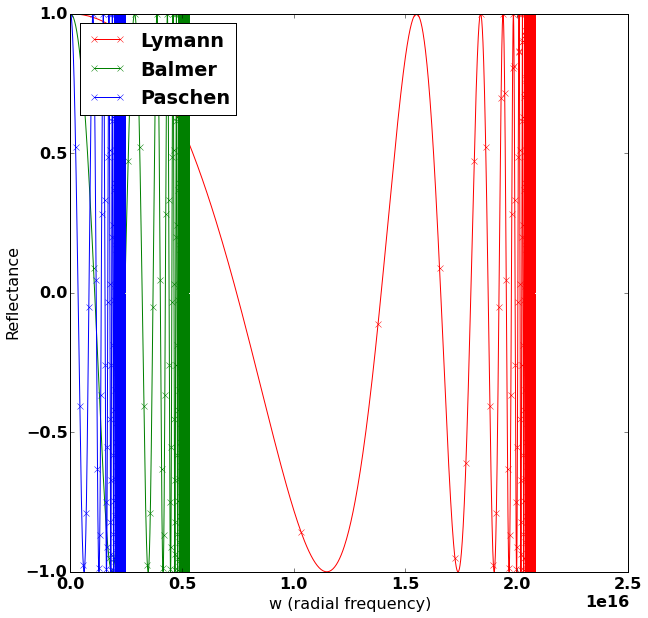

In [68]:
upto=10000
plt.plot(w(1, upto), reflectance(1, upto), color='red', label='Lymann', marker='x', markevery=100)
plt.plot(w(4, upto), reflectance(4, upto), color='green', label='Balmer', marker='x', markevery=100)
plt.plot(w(9, upto), reflectance(9, upto), color='blue', label='Paschen', marker='x', markevery=100)
plt.ylabel('Reflectance')
plt.xlabel('w (radial frequency)')
plt.legend(loc='upper left')

In [8]:
w(4, upto+1000000)[-1]

5167651201049674.0

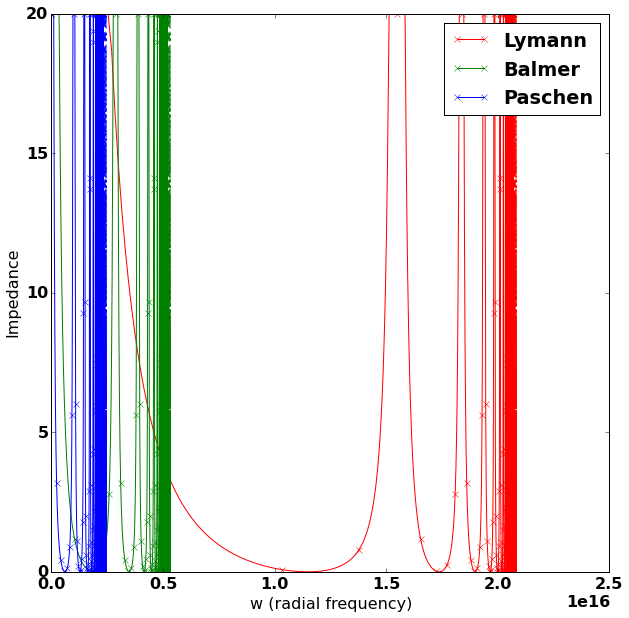

In [69]:
#plt.plot(w(n),np.clip(impedance(n),0,1000), color='red', label='Lymann')
plt.plot(w(1, upto), np.clip(impedance(1, upto), 0 , 20), color='red', label='Lymann', marker='x', markevery=100)
plt.plot(w(4, upto), np.clip(impedance(4, upto), 0 , 20), color='green', label='Balmer', marker='x', markevery=100)
plt.plot(w(9, upto), np.clip(impedance(9, upto), 0 , 20), color='blue', label='Paschen', marker='x', markevery=100)
plt.ylabel('Impedance')
plt.xlabel('w (radial frequency)')
plt.legend(loc='upper right')

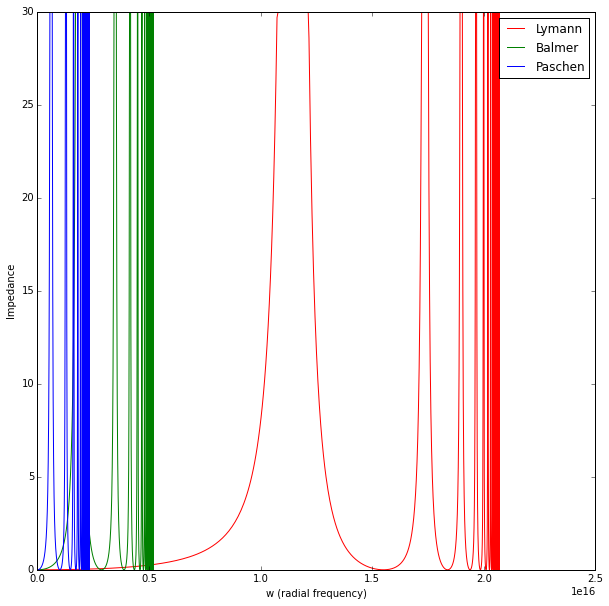

In [10]:
plt.plot(w(1, upto), np.clip(admittance(1, upto), 0 , 30), color='red', label='Lymann')
plt.plot(w(4, upto), np.clip(admittance(4, upto), 0 , 30), color='green', label='Balmer')
plt.plot(w(9, upto), np.clip(admittance(9, upto), 0 , 30), color='blue', label='Paschen')
plt.ylabel('Impedance')
plt.xlabel('w (radial frequency)')
plt.legend(loc='upper right')

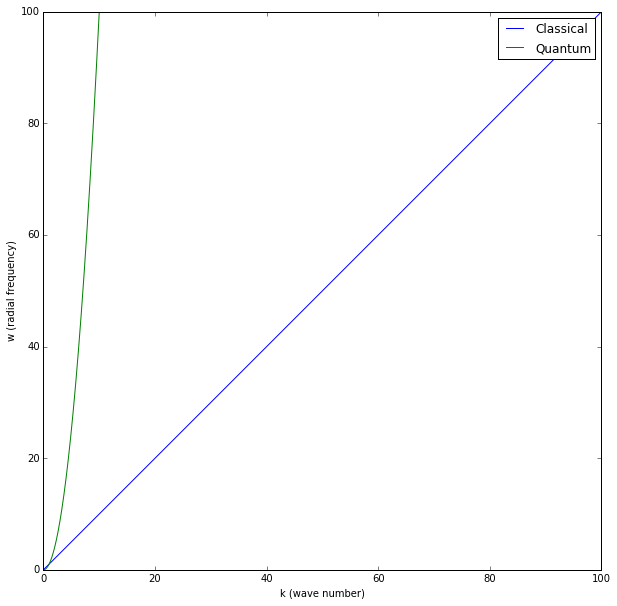

In [11]:
def k1(w):
    return w
def k2(w):
    return np.sqrt(w)
w = np.arange(0, 100, .01)
plt.plot(k1(w), w, color='blue', label='Classical')
plt.plot(k2(w), w, color='green', label='Quantum')
plt.xlabel('k (wave number)')
plt.ylabel('w (radial frequency)')
plt.legend(loc='upper right')

In [ ]:
plt.ylabel('Impedance')
plt.xlabel('w (radial frequency)')
